In [ ]:
library(jsonlite);
library(ggplot2);
library(stringr);
library(dplyr);

In [3]:
business_city <- jsonlite::stream_in(file("business_city.json"),pagesize = 36327);
review_city <- jsonlite::stream_in(file("review_city.json"),pagesize = 942027);

opening file input connection.



 Imported 36327 records. Simplifying...


closing file input connection.

opening file input connection.



 Imported 942027 records. Simplifying...


closing file input connection.



In [10]:
business_city = as.data.frame(business_city)
review_city = as.data.frame(review_city)
business = cbind(business_city[,-c(12,14)], data.frame(business_city[,12]), 
                 data.frame(business_city[,14]))

In [11]:
dessert = business %>% 
  filter(grepl("Ice Cream|Desserts|Donuts|Yogurt",ignore.case=T,categories))
nrow(dessert)
review = review_city %>%
  filter(business_id  %in% dessert$business_id)
nrow(review) 


[1] 1317

[1] 57096

In [12]:
length(unique(dessert$city)); #189cities
unique(dessert$state); #4 states

[1] 189

[1] "WI" "OH" "PA" "IL"

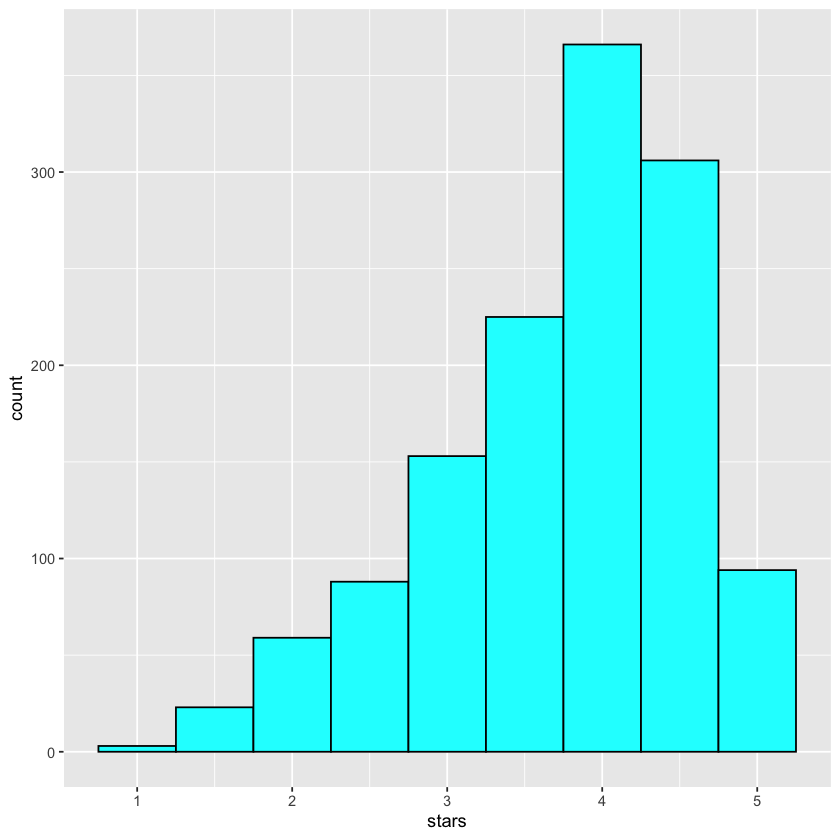

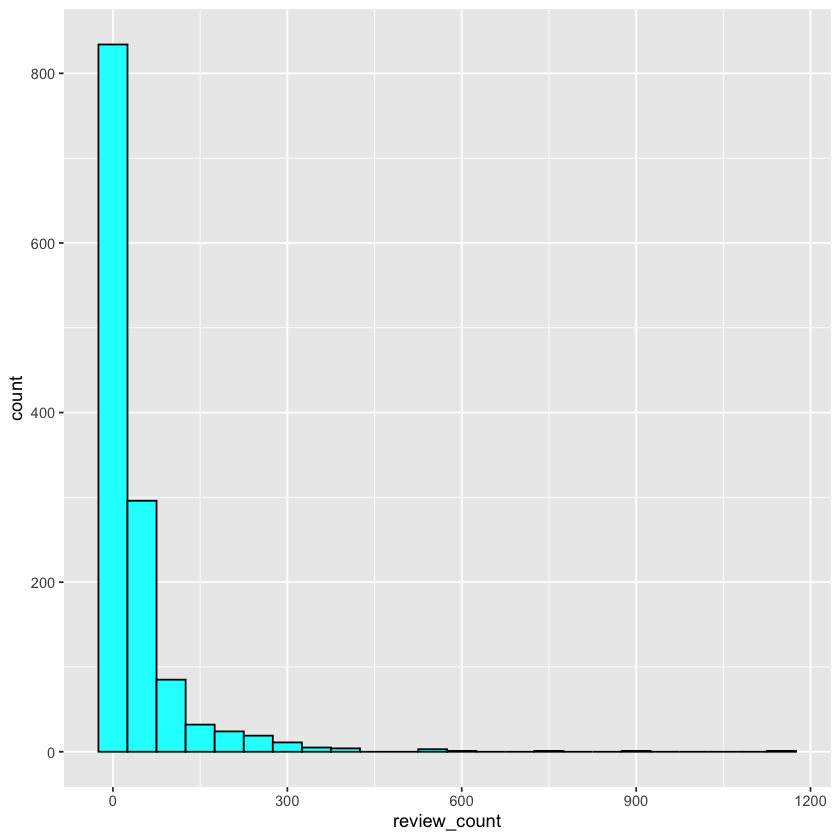

In [13]:
#stars
ggplot(dessert, aes(x = stars)) +
  geom_histogram(binwidth = 0.5, fill = "cyan", col = "black") 

#review count
ggplot(dessert, aes(x = review_count)) +
  geom_histogram(binwidth = 50, fill = "cyan", col = "black") 

#takeout

#credit card

#parking



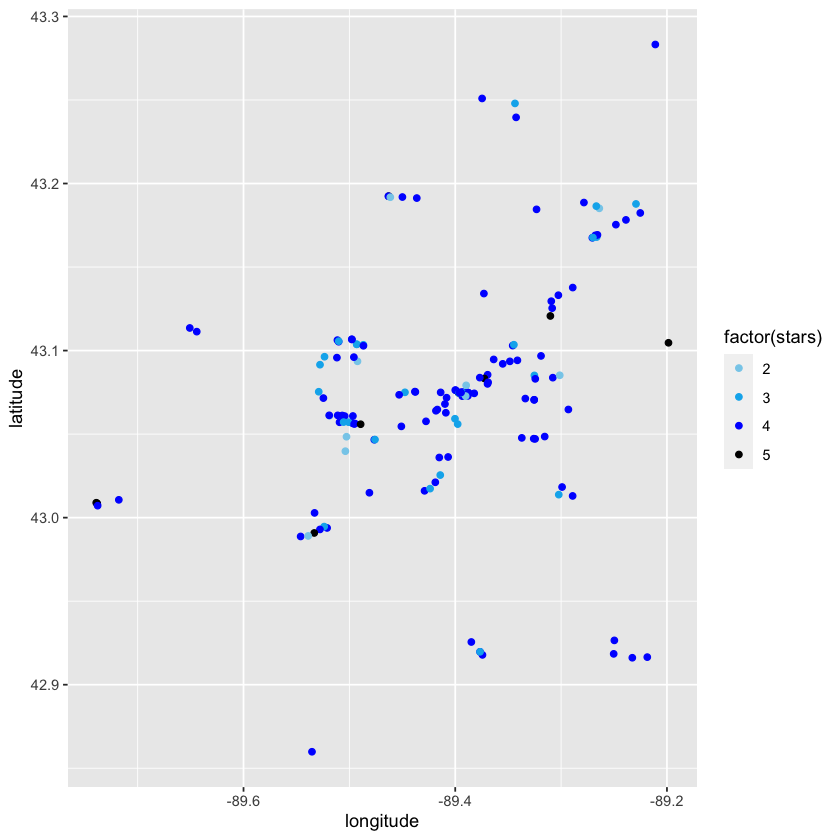

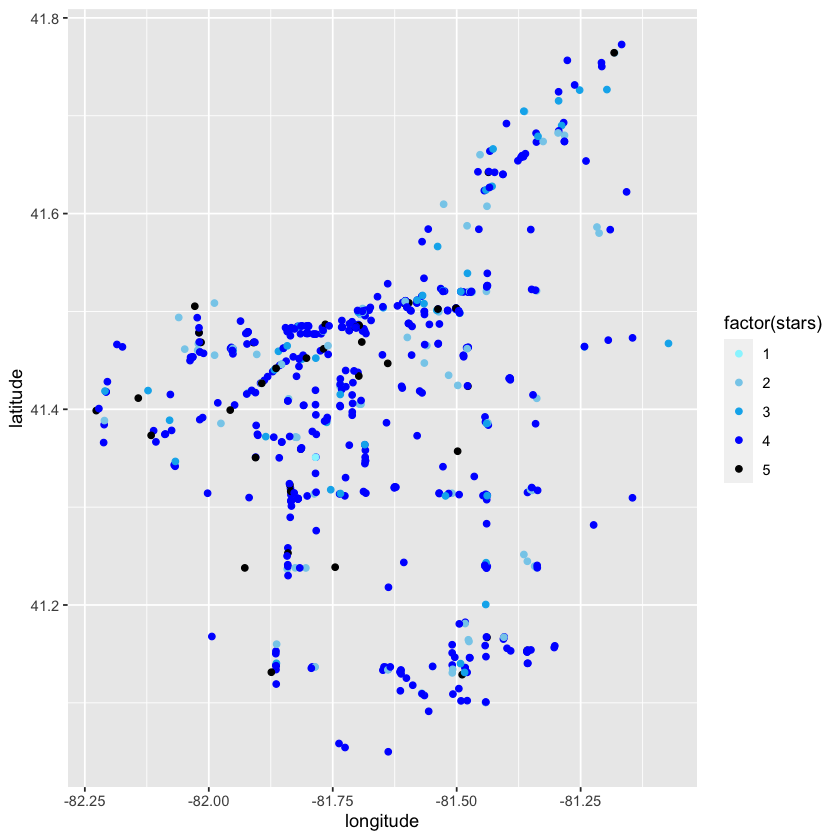

In [14]:
position = dessert[,c('state', 'longitude', 'latitude','stars')]
position$stars = round(position$stars)
ggplot(position[which(position$state == "WI"),], aes(x = longitude, y = latitude, group = factor(stars))) +
  geom_point(aes(color = factor(stars)))+
  scale_color_manual(values = c('skyblue', 'deepskyblue2', 'blue', 'black'))
ggplot(position[which(position$state == "OH"),], aes(x = longitude, y = latitude, group = factor(stars))) +
  geom_point(aes(color = factor(stars)))+
  scale_color_manual(values = c('cadetblue1','skyblue', 'deepskyblue2', 'blue', 'black'))


In [14]:
library(readxl);
library(jiebaR);
library(plyr);
library(wordcloud2);

Loading required package: jiebaRD

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [19]:
review$index = 1:nrow(review)
engine = worker()

temp = tolower(review$text)
temp = gsub("'s"," is ", temp)
temp = gsub(";"," ", temp)
temp = gsub(","," ", temp)
temp = gsub("'"," ", temp)
temp = gsub(":"," ", temp)
temp = gsub("-"," ", temp)
temp = gsub("`"," ", temp)
temp = gsub("\n"," ", temp)
temp = gsub('\"'," ", temp, fixed = TRUE)
temp = gsub("?"," ", temp, fixed = TRUE)
temp = gsub("*"," ", temp, fixed = TRUE)
temp = gsub("."," ", temp, fixed = TRUE)
temp = gsub("!"," ", temp, fixed = TRUE)
temp = gsub("[^a-zA-Z]"," ",temp)
segwords = llply(temp, segment, engine)

In [41]:
head(segwords,3)

[[1]]
 [1] "the"           "server"        "had"           "an"           
 [5] "extensive"     "knowledge"     "of"            "wines"        
 [9] "their"         "various"       "menu"          "selections"   
[13] "and"           "it"            "was"           "clear"        
[17] "that"          "we"            "were"          "her"          
[21] "top"           "priority"      "the"           "pizza"        
[25] "and"           "dessert"       "were"          "amazing"      
[29] "my"            "only"          "complaint"     "is"           
[33] "that"          "the"           "chairs"        "were"         
[37] "uncomfortable" "i"             "think"         "they"         
[41] "could"         "add"           "some"          "more"         
[45] "comfortable"   "seating"       "to"            "give"         
[49] "this"          "more"          "of"            "a"            
[53] "wine"          "bar"           "feel"          "otherwise"    
[57] "everything"    "was"           "amazing"      

[[2]]
  [1] "the"        "food"       "here"       "is"         "very"      
  [6] "good"       "but"        "not"        "great"      "i"         
 [11] "had"        "the"        "enchiladas" "reynas"     "again"     
 [16] "good"       "but"        "not"        "great"      "could"     
 [21] "have"       "done"       "with"       "some"       "more"      
 [26] "flavors"    "we"         "had"        "salsa"      "and"       
 [31] "chips"      "guac"       "and"        "margaritas" "margarita" 
 [36] "was"        "ok"         "guac"       "was"        "yummy"     
 [41] "chips"      "and"        "salsa"      "were"       "excellent" 
 [46] "i"          "would"      "give"       "this"       "place"     
 [51] "a"          "strong"     "stars"      "for"        "food"      
 [56] "and"        "atmosphere" "the"        "place"      "had"       
 [61] "a"          "very"       "nice"       "atmosphere" "though"    
 [66] "was"        "a"          "bit"        "loud"       "the"       
 [71] "reason"     "for"        "the"        "stars"      "was"       
 [76] "the"        "service"    "while"      "they"       "were"      
 [81] "extremely"  "nice"       "when"       "asked"      "for"       
 [86] "anything"   "we"         "had"        "to"         "ask"       
 [91] "often"      "missing"    "parts"      "of"         "our"       
 [96] "orders"     "incorrect"  "items"      "on"         "check"     
[101] "and"        "a"          "standard"   "dinner"     "of"        
[106] "drinks"     "apps"       "and"        "entrees"    "took"      
[111] "over"       "hours"      "a"          "few"        "more"      
[116] "servers"    "would"      "really"     "bring"      "this"      
[121] "place"      "up"         "a"          "notch"      "would"     
[126] "i"          "go"         "back"       "yes"        "the"       
[131] "menu"       "is"         "flushed"    "out"        "enough"    
[136] "and"        "the"        "food"       "was"        "tasty"     
[141] "would"      "enjoy"      "trying"     "the"        "fajitas"   
[146] "server"     "in"         "a"          "half"       "pineapple" 
[151] "one"        "other"      "party"      "member"     "had"       

[[3]]
 [1] "despite"    "it"         "being"      "a"          "vegetarian"
 [6] "vegan"      "and"        "healthy"    "place"      "to"        
[11] "dine"       "their"      "pastrami"   "sandwich"   "with"      
[16] "thousand"   "island"     "dressing"   "on"         "rye"       
[21] "bread"      "is"         "delicious"  "in"         "my"        
[26] "opinion"    "the"        "prices"     "are"        "a"         
[31] "bit"        "steep"      "for"        "the"        "type"      
[36] "of"         "food"       "there"      "aren"       "t"         
[41] "a"          "lot"        "of"         "meat"       "options"   
[46] "available"  "but"        "if"         "you"        "are"       
[51] "craving"    "something"  "hearty"     "order"      "th

In [38]:
word1 = cbind(review$stars, segwords[-length(segwords)]) 

Warning message in cbind(review$stars, segwords[-length(segwords)]):
“number of rows of result is not a multiple of vector length (arg 2)”


In [35]:
m = review[, c("stars","useful", "funny", "cool")]

In [36]:
m$length = 1:nrow(m)
for (i in 1:nrow(word1)){
    m[,5][i] = length(unlist(word1[i,2]))
}

In [37]:
head(m)
cor(m)

,stars,useful,funny,cool,length
,<dbl>,<int>,<int>,<int>,<int>
1,4,3,0,0,59
2,3,1,0,0,155
3,4,0,0,0,59
4,5,2,0,0,153
5,5,0,0,0,76
6,1,0,2,0,24


,stars,useful,funny,cool,length
stars,1.00000000,-0.03764556,-0.01359666,0.08571854,-0.1541221
useful,-0.03764556,1.00000000,0.74872463,0.82883889,0.3204843
funny,-0.01359666,0.74872463,1.00000000,0.80409172,0.2227713
cool,0.08571854,0.82883889,0.80409172,1.00000000,0.2187651
length,-0.15412210,0.32048425,0.22277131,0.21876514,1.0000000
